In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
#데이터 형상 관련 상수
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [3]:
#학습 데이터 준비하기
filenames = os.listdir("dogs-vs-cats/train/train")
filenames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [6]:
df = pd.DataFrame(filenames, columns=['filename'])
df

,filename
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg
...,...
24995,dog.9995.jpg
24996,dog.9996.jpg
24997,dog.9997.jpg
24998,dog.9998.jpg


In [10]:
df['category'] = np.where(df['filename'].str.startswith('dog'),1,0)
df

# categories=[]
# for filename in filenames:
#     category = filename.split(".")[0]
#     if category == 'dog':
#         categories.append(1)
#     else:
#         categories.append(0)
# pd.DataFrame({'filename':filenames, 'category':categories})

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


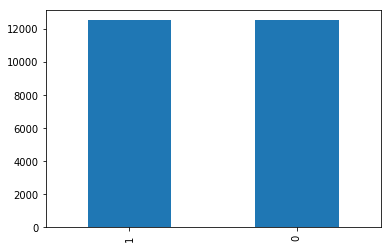

In [15]:
#1과0의 개수 시각화
df['category'].value_counts().plot.bar()

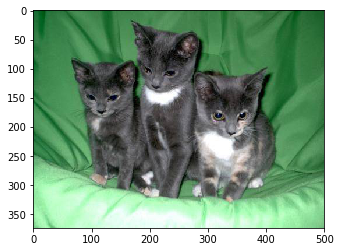

In [21]:
sample = random.choice(filenames)
image = load_img("dogs-vs-cats/train/train/"+sample)  #이미지를 불러오는 함수
plt.imshow(image)

In [ ]:
"""
배치 정규화(Batch Normalization): 신경망 입력 데이터를
평균:0, 분산:1로 정규화 해서 학습이 잘 이루어지도록 하는 것
fit(batch_size=32) 

강아지-레이어1      -   레이어2    -     레이어3    -     FC(Fully Connected)   -   분류결과
       (Conv)                                             (Flatten)
       (BatchNorm)                                        (Dense)
       (Pool)                                             (BatchNorm)
       (DropOut)                                          (DropOut)
"""

In [22]:
from keras.models import Sequential
from keras.layers import *

In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [24]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [25]:
# reducelronplateau : loss가 더 이상 개선되지 않으면 lr을 감소시켜라 (콜백함수)

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
earlystop = EarlyStopping(patience=10)

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, 
                                            min_lr=0.00001, verbose=1)

In [29]:
callbacks = [earlystop, learning_rate_reduction]

In [30]:
#이미지 제너레이터에서 class_mode='categorical'로 지정하기 위해
#컬럼 카테고리를 string으로 변경
df['category'] = df['category'].replace({0:'cat', 1:'dog'})

In [31]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)

In [34]:
train_df.shape #(20000, 2)
validate_df.shape #(5000, 2)

(5000, 2)

In [37]:
train_df = train_df.reset_index(drop=True)

In [40]:
validate_df = validate_df.reset_index(drop=True)

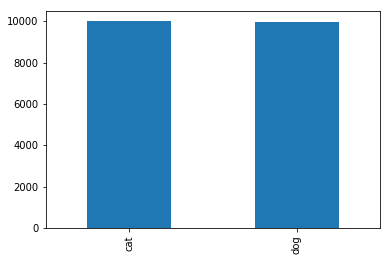

In [44]:
train_df['category'].value_counts().plot.bar()
validate_df['category'].value_counts().plot.bar()

In [49]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [50]:
#트레이닝 데이터 제너레이터 설정

In [55]:
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, shear_range=0.1, zoom_range=0.2,
                                   horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

In [61]:
train_generator = train_datagen.flow_from_dataframe(train_df, "dogs-vs-cats/train/train/", 
                                                    x_col='filename', y_col='category', 
                                                    target_size=IMAGE_SIZE, class_mode='categorical',
                                                    batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [62]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df, "dogs-vs-cats/train/train/", 
                                                          x_col='filename', y_col='category', 
                                                          target_size=IMAGE_SIZE, 
                                                          class_mode='categorical', 
                                                          batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [65]:
example_df = train_df.sample(n=1).reset_index(drop=True)

In [66]:
example_generator = train_datagen.flow_from_dataframe(example_df, "dogs-vs-cats/train/train/", 
                                    x_col='filename', y_col='category', target_size=IMAGE_SIZE, 
                                    class_mode='categorical' )

Found 1 validated image filenames belonging to 1 classes.


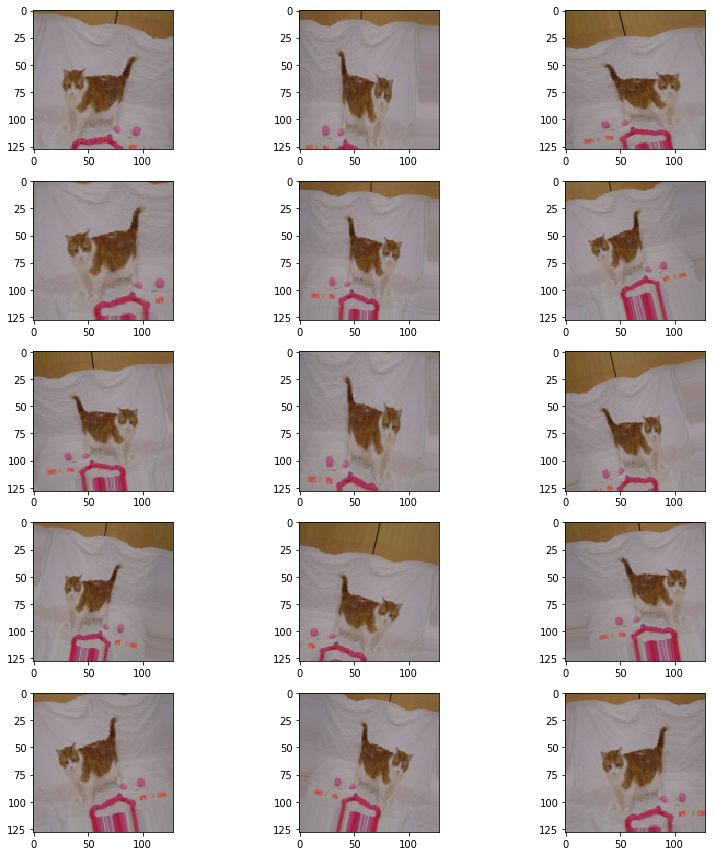

In [67]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1) #(5,3,1)...(5,3,15)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [71]:
FAST_RUN = True
epochs=3 if FAST_RUN else 50

In [72]:
history = model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=total_train//batch_size,
                             validation_data=validation_generator, validation_steps=total_validate//batch_size,
                             callbacks=callbacks)

Epoch 1/3
1332/1333 [============================>.] - ETA: 0s - loss: 0.7143 - accuracy: 0.6372

KeyboardInterrupt: 

In [ ]:
model.save("model.h5")

In [ ]:
"""
1. 시각화
history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']

2. 테스트
testdf = ('filename':테스트파일)
testdf.shape[0]
test_datagen = ImageDataGenerator(rescale=1)
test_generator = test_datagen.flow_from_dataframe(test_df, "dogs-vs-cats/train/train/", 
                                                   x_col='filename', y_col=None, 
                                                   target_size=IMAGE_SIZE, class_mode=None,
                                                   batch_size=batch_size, shuffle=False)

3. 예측
predict = model.predict_generator(test_generator, steps=nbsamples/batch_size)

4. argmax
testdf['category'] = np.argmax(predict, axis=)

"""

In [73]:
import keras
fm = keras.datasets.fashion_mnist
(trainImage, trainLabel), (testImage, testLabel) = fm.load_data()

4423680/4422102 [==============================] - 3s 1us/step
